## PyEDM Workshop
### Alessandra Camassa acamassa@salk.edu
___________________________________________________________________

### Install an import pyEDM
follow the instructions on 
https://pypi.org/project/pyEDM/ for installation

In [2]:
# import pyEDM package
import pyEDM
from pyEDM import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
print(pyEDM.__version__)

2.0.1


### Using example data
Import pandas library to load your data.
In this example, we use the data that are included in the pyEDM package

In [3]:
import pandas as pd

data=pd.read_csv('/Users/iuliarusu/miniconda3/envs/SSR/lib/python3.11/site-packages/pyEDM/data/TentMap.csv')
data

,Time,TentMap
0,1,-0.09920
1,2,-0.60130
2,3,0.79980
3,4,-0.79441
4,5,0.79800
...,...,...
994,995,-0.69848
995,996,0.77053
996,997,-1.20288
997,998,0.91498


### Using your own data
If you want to use your own data this is what you need to do:
1. load data as DataFrame using pandas e.g. https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/
2. if your data is in a different format you can load them as an array and then convert them into a DataFrame https://www.geeksforgeeks.org/convert-a-numpy-array-to-pandas-dataframe-with-headers/
3. the first column of the DataFrame must be Time, you can add a time column using: 
data.insert(loc=0, column='time', value=np.arange(0,len(data),1))
4. make sure that the columns names in your DataFrame are strings, you can check it running data.columns(), otherwise convert it using: 
column_mapping = {column: str(column) for column in data.columns}
data.rename(columns=column_mapping, inplace=True)

In [4]:
#import worm0 data
AVA = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_0_df.csv')  
RME = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_0_df.csv') 
SMDD =  pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv') 
SMDV = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_0_df.csv')

In [5]:
ON_cells = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/Yop50_SF_psON.npz')
OFF_cells = np.load('/Users/iuliarusu/Documents/Sharpee/ProcAiryData/Yop50_SF_psOFF.npz')

In [6]:
ON_concat = np.concatenate([ON_cells['arr_0'], ON_cells['arr_1'], ON_cells['arr_2'], ON_cells['arr_3'], ON_cells['arr_4'], ON_cells['arr_5'], ON_cells['arr_6']] , axis = 1)
OFF_concat = np.concatenate([OFF_cells['arr_0'], OFF_cells['arr_1'], OFF_cells['arr_2'], OFF_cells['arr_3'], OFF_cells['arr_4'], OFF_cells['arr_5'], OFF_cells['arr_6']] , axis = 1)

In [7]:
ON_concat = pd.DataFrame(ON_concat.T)
OFF_concat = pd.DataFrame(OFF_concat.T)

In [12]:
ON_ids = np.array(ON_concat.shape[0] * ['ON'])
OFF_ids = np.array(OFF_concat.shape[0] * ['OFF'])

In [13]:
ON_ids.shape

(29,)

In [15]:
ON_concat['cell_id'] = ON_ids
OFF_concat ['cell_id'] = OFF_ids

In [17]:
ON = ON_concat 
OFF = OFF_concat

In [19]:
ON

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,cell_id
0,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.139586,0.090089,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,ON
1,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.057722,0.054529,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,ON
2,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.099837,0.117549,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,ON
3,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.054821,0.094158,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,ON
4,0.113358,0.145652,0.110831,0.103521,0.083500,0.087598,0.106528,0.126235,0.104085,0.136004,...,0.060869,0.075667,0.066197,0.059868,0.049471,0.097512,0.099438,0.067180,0.065756,ON
5,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.036667,0.069045,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,ON
6,0.205371,0.175247,0.193966,0.175695,0.203902,0.102485,0.187159,0.170857,0.200971,0.180125,...,0.110735,0.091389,0.122850,0.170404,0.220731,0.247057,0.301267,0.207900,0.156760,ON
7,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.079332,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161,ON
8,0.077771,0.050388,0.038936,0.063386,0.057993,0.087070,0.068161,0.045648,0.060495,0.052107,...,0.070857,0.074979,0.084153,0.108473,0.132419,0.153624,0.178262,0.162290,0.148391,ON
9,0.123334,0.114243,0.156110,0.118286,0.123836,0.131926,0.158052,0.132808,0.139767,0.162605,...,0.022656,0.069008,0.075413,0.069472,0.079777,0.079524,0.087750,0.078156,0.012485,ON


In [18]:
#restructure AVA df, move cell id column over to 
# Step 1: Extract the first column and save it
cell_ids_ON = ON['Unnamed: 0']

# Step 2: Drop the first column from the original position
ON = ON.drop('Unnamed: 0', axis=1)

# Step 3: Append it to the end of the DataFrame
ON['Cell IDs'] = cell_ids_ON

ON

KeyError: 'Unnamed: 0'

In [13]:
#remove metadata
SMDD = SMDD.iloc[:, :-3]
SMDD



,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.45306,0.434332,0.497556,0.577081,0.58191,0.525287,0.528457,0.429149,0.395782,0.369393,...,0.101272,0.088998,0.134701,0.209019,0.300678,0.391215,0.3817,0.497494,0.505217,0.646212


In [14]:

# Transpose and add a column name for the cell value corresponding to the calcium data
SMDD_time = SMDD.T
SMDD_time.columns = cell_ids_SMDD



In [15]:
SMDD_time

Unnamed: 0,40
0,0.453060
1,0.434332
2,0.497556
3,0.577081
4,0.581910
...,...
1595,0.391215
1596,0.381700
1597,0.497494
1598,0.505217


In [16]:
#name the cell containing columns with the _cell prefix

SMDD_time.columns = ['cell_' + str(col) for col in SMDD_time.columns]

In [17]:
SMDD_time

,cell_40
0,0.453060
1,0.434332
2,0.497556
3,0.577081
4,0.581910
...,...
1595,0.391215
1596,0.381700
1597,0.497494
1598,0.505217


In [18]:
# Create the 'time' column values
time_values = np.arange(0, len(SMDD_time), 1)

# Insert the 'time' column into the transposed DataFrame
SMDD_time.insert(loc=0, column='Time', value=time_values)


In [19]:
SMDD_time

,Time,cell_40
0,0,0.453060
1,1,0.434332
2,2,0.497556
3,3,0.577081
4,4,0.581910
...,...,...
1595,1595,0.391215
1596,1596,0.381700
1597,1597,0.497494
1598,1598,0.505217


### Always look at your data!! 
you can plot them using matplotlib, pandas, seaborn, plotly...

Text(0, 0.5, 'Values')

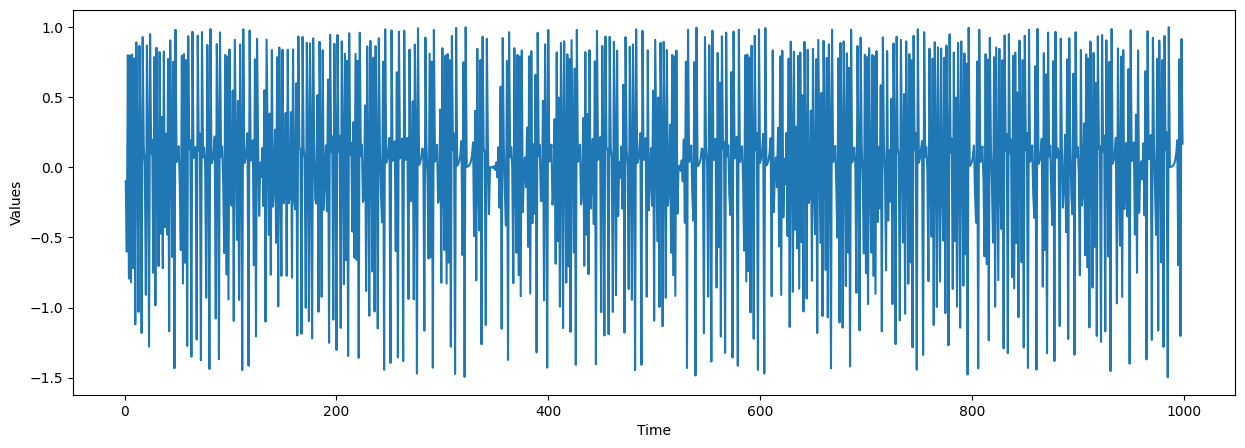

In [10]:
# plotting data with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(data['Time'], data['TentMap'])
plt.xlabel('Time')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

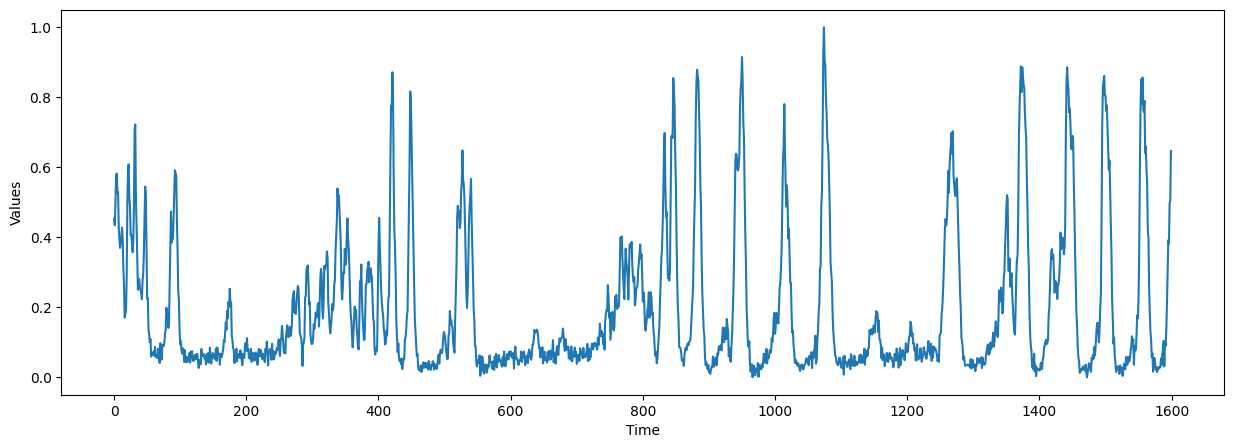

In [21]:
#look at data
plt.figure(figsize=(15,5))
plt.plot(SMDD_time['Time'], SMDD_time['cell_40'])
#plt.plot(SMDD_time['Time'], SMDD_time['cell_1'])
plt.xlabel('Time')
plt.ylabel('Values')

# Estimate optimal embedding dimension
Do this for each of the columns in your DataFrame (e.g. for each neuron you record from)

In [22]:
from pyEDM import EmbedDimension

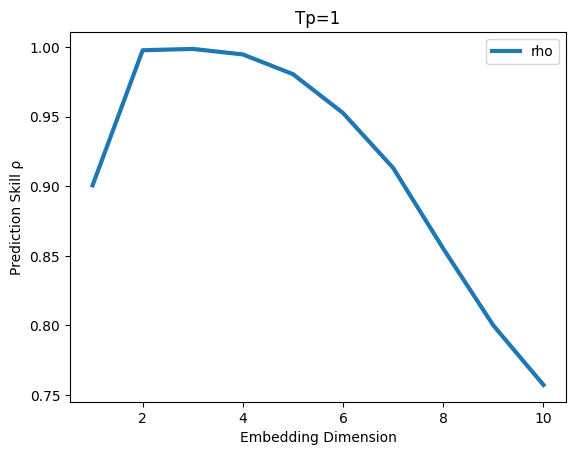

In [22]:
# use EmbedDimension from pyEDM package
# you can use half of your data as library: lib 
# and predict the other half of the data: pred
# the default is to test for E=1:10 but you can increase it using the maxE parameter 


out_E = EmbedDimension( dataFrame = data, lib = "1 500", pred = "501 999", 
                columns = "TentMap" , target = 'TentMap')
#added prediction target name, the name of the column you want to predict

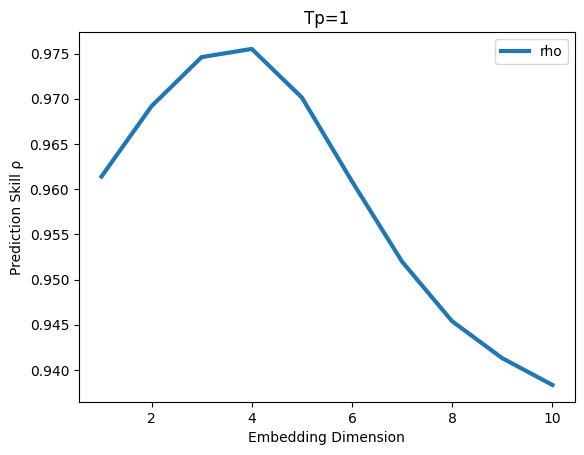

In [23]:
#out E for each column
out_E_SMDD_cell_40 = EmbedDimension( dataFrame = SMDD_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_40" , target = 'cell_40')

In [156]:
#function if multiple cells in dataset

def max_rho_e(df):
    return df.loc[df['rho'].idxmax(), 'E']

# List comprehension to apply function to each DataFrame
max_e_values = [max_rho_e(df) for df in out_E_AVA_list]

# Calculate the average of these E values
average_e = sum(max_e_values) / len(max_e_values)

In [157]:

#average_e

4.9

In [171]:
AVA_Estar = pd.DataFrame({
    'Cell IDs': cell_ids_AVA,
    'Max E Values': max_e_values
})


In [172]:
AVA_Estar 

,Cell IDs,Max E Values
0,1,5
1,2,3
2,10,7
3,18,3
4,32,5
5,42,4
6,52,6
7,55,3
8,67,7
9,82,6


In [26]:
# the output of this function contains the values of rho (accuracy of the prediction) 
# for each value of E tested
out_E_SMDD_cell_40

,E,rho
0,1,0.961390
1,2,0.969181
2,3,0.974612
3,4,0.975515
4,5,0.970140
5,6,0.960871
6,7,0.951983
7,8,0.945385
8,9,0.941301
9,10,0.938344


In [28]:
# the dimensionality of your data is the E that corresponds to maximum prediction skills (rho)
# you can call it E_star, that's the value you should use for the rest of the analysis
# you can obtain E_star using numpy as follows:

import numpy as np
E_star=out_E_SMDD_cell_40['E'][np.argmax(out_E_SMDD_cell_40['rho'])]
E_star=int(E_star)
print(E_star)

4


### Simplex prediction
here you are builing a E dimensional delay embedding of the variable in the selected column using lib time points, 
and using it to predict the future pred time points of that variable, see
https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/

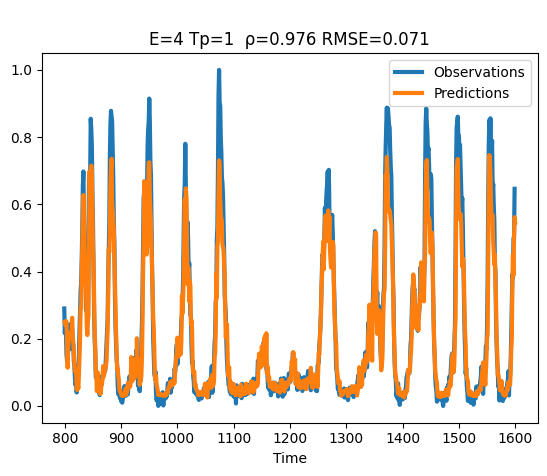

In [29]:
s = Simplex( dataFrame = SMDD_time, lib = "1 799", pred = "800 1600", 
         columns = "cell_40", target = 'cell_40' , tau=-1, Tp=1, E = E_star, showPlot = True )

### Prediction Horizon
You can check the best predition horizon (Tp, i.e. how many time steps in the future you want to predict) 
for your data using PredictInterval from pyEDM

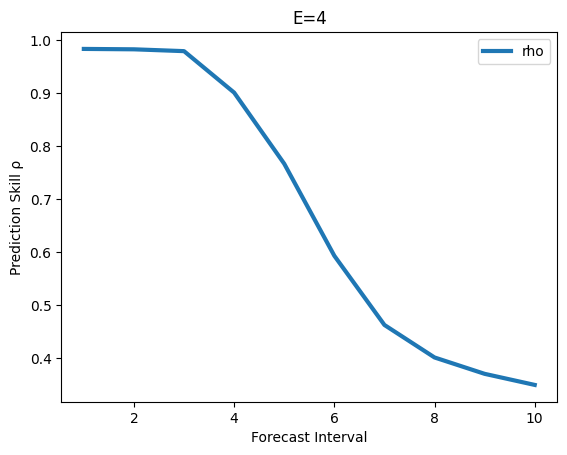

,Tp,rho
0,1,0.982887
1,2,0.982149
2,3,0.978695
3,4,0.900524
4,5,0.766338
5,6,0.592751
6,7,0.462263
7,8,0.400961
8,9,0.370087
9,10,0.349176


In [31]:
#calculate the prediction interval (tp)
PredictInterval( dataFrame = SMDD_time, lib = "1 100", pred = "201 500",
                 columns = "cell_40",target = 'cell_40',  E = E_star, tau = 1)


### Autocorrelation
it is a good practice to estimate the autocorrelaiton of your data
and compare the autocorrelation to the predictability at different time steps
you should use a Tp where rho is higher than autocorrelation


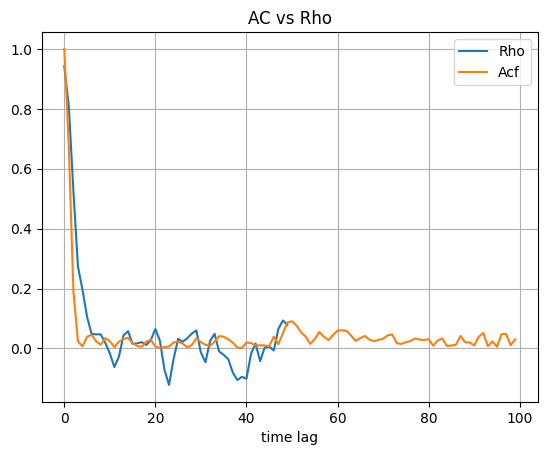

In [12]:
# compare autocorrelation and rho varying Tp

import statsmodels.api as sm
E_star=3
ac=sm.tsa.acf(data['TentMap'], nlags=99)
pred_int=PredictInterval( dataFrame = data, lib="1 100", pred="201 500",
                columns = 'TentMap', E =E_star, maxTp=50, showPlot=False)

plt.figure()
plt.plot(pred_int['rho'])
plt.plot(abs(ac))
plt.title('AC vs Rho')
plt.grid()
plt.xlabel('time lag')
plt.legend(['Rho','Acf'])

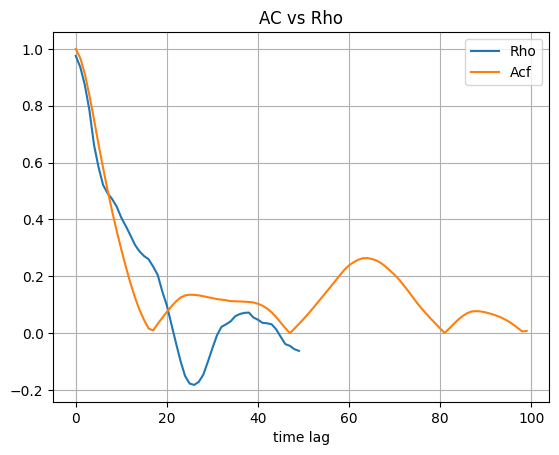

In [34]:
# compare autocorrelation and rho varying Tp

import statsmodels.api as sm
E_star= E_star
ac=sm.tsa.acf(SMDD_time['cell_40'], nlags=99)
pred_int=PredictInterval( dataFrame = SMDD_time, lib="1 799", pred="800 1599",
                columns = 'cell_40', target = "cell_40", E =E_star, maxTp=50, showPlot=False)

plt.figure()
plt.plot(pred_int['rho'])
plt.plot(abs(ac))
plt.title('AC vs Rho')
plt.grid()
plt.xlabel('time lag')
plt.legend(['Rho','Acf'])

### Selecting the best time shift tau
tau represents the time shift you apply to your data to build the delay embedding
you should check different values of tau to find the one that maximise the predictability of your data


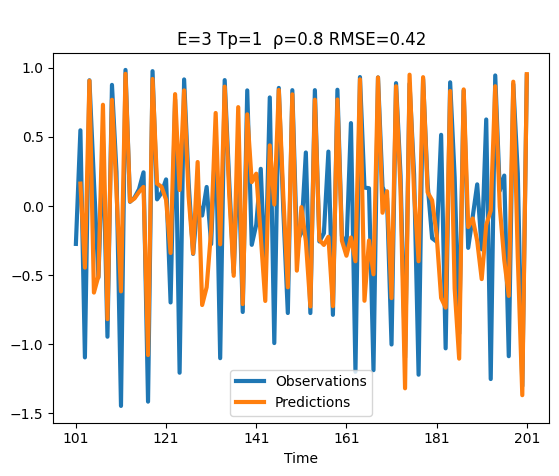

,Time,Observations,Predictions,Pred_Variance
0,101,-0.27407,NaN,NaN
1,102,0.54787,0.162259,0.682638
2,103,-1.09519,-0.445601,0.338195
3,104,0.90979,0.906758,0.004010
4,105,0.17961,-0.626137,0.170738
...,...,...,...,...
96,197,-1.08640,-0.650257,0.449700
97,198,0.88162,0.899414,0.004612
98,199,0.23569,-0.370727,0.298695
99,200,-1.30285,-1.368586,0.000007


In [13]:
# testing tau = -2 
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap",tau=-2, Tp=1, E = E_star, showPlot = True )
# see from the plot that in this case with tau=-2 the predictability decreases!

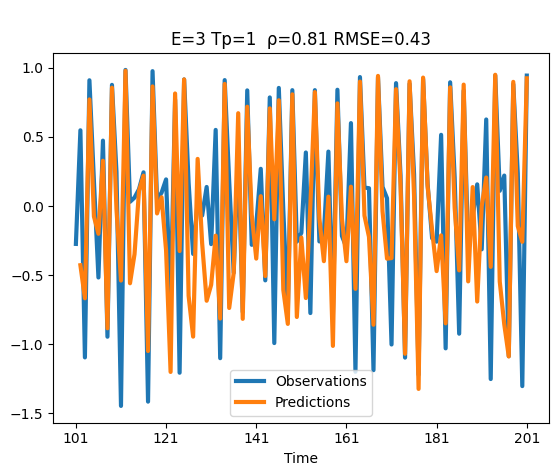

,Time,Observations,Predictions,Pred_Variance
0,101,-0.27407,NaN,NaN
1,102,0.54787,-0.428186,0.348913
2,103,-1.09519,-0.667425,0.328756
3,104,0.90979,0.771164,0.045936
4,105,0.17961,-0.075510,0.136657
...,...,...,...,...
96,197,-1.08640,-1.088371,0.356414
97,198,0.88162,0.898255,0.004897
98,199,0.23569,-0.145041,0.191265
99,200,-1.30285,-0.258722,0.388944


In [14]:
# testing tau = -3
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap",tau=-3, Tp=1, E = E_star, showPlot = True )
# see from the plot that in this case with tau=-3 the predictability decreases!

### SMap
recommended for noisy or complex data, see
https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/
https://sugiharalab.github.io/EDM_Documentation/SMap_Demo/

To use SMap, you need to know the E and tau to use. You find those with Simplex as we did before!
Pay attention to the new parameter theta!


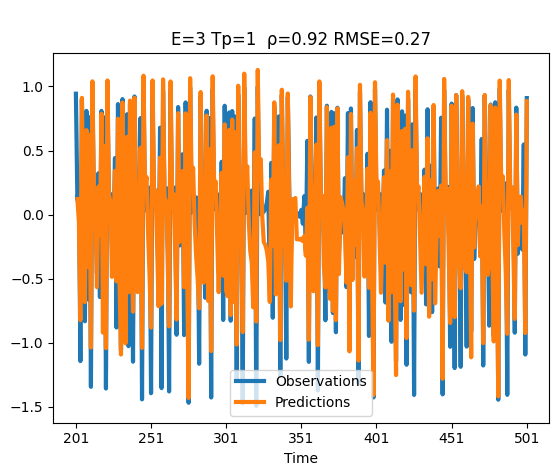

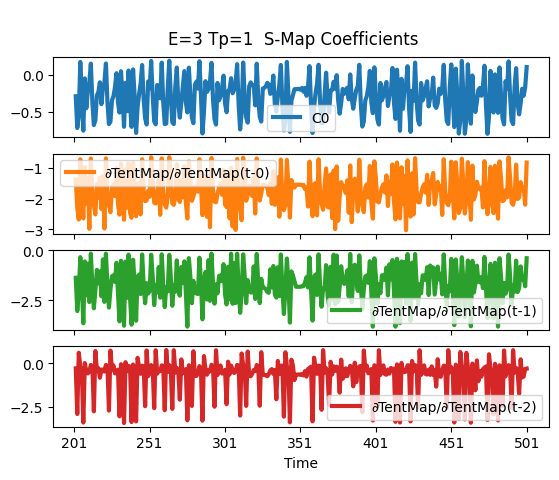

In [15]:
SMap( dataFrame = data, lib = "1 100", pred = "201 500", 
      columns = "TentMap", E = E_star, theta = 3, showPlot = True );

### Use PredictNonlinear
to find the optimal theta for your data
the optimal theta is the one that maximise yor prediction skills!

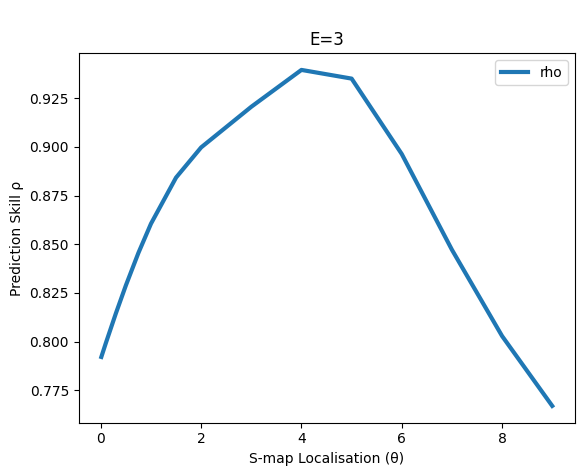

In [16]:
PredictNonlinear( dataFrame = data, lib = "1 100", pred = "201 500",
                  columns = "TentMap", E = E_star );
# see from the plot that in this case theta=4 is the best

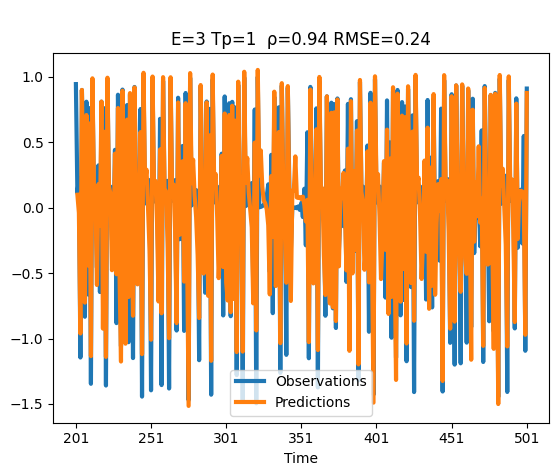

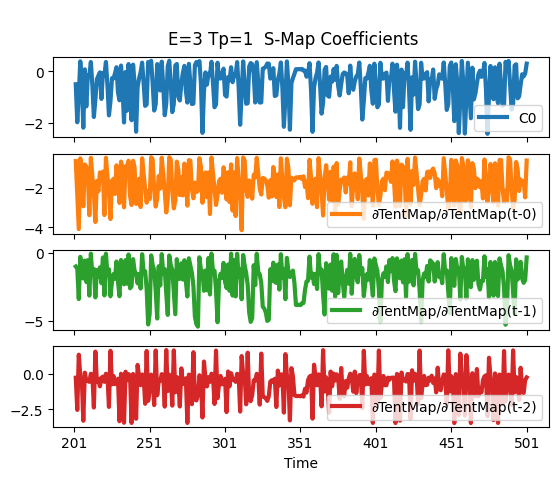

In [17]:
# repeat SMap computation with the theta you found in order to obtain the best prediction
SMap( dataFrame = data, lib = "1 100", pred = "201 500", 
      columns = "TentMap", E = E_star, theta = 4, showPlot = True );
# notice that rho increased from 0.92 to 0.94 using the optimal theta!

### Delay embedding
you can build a DataFrame containing the delay embedding of your variable using the functions
Embed or MakeBlock from pyEDM
you can use this to easily plot the Takens embedding manifold of your data

In [18]:
embedding=Embed(pathIn='/Users/acamassa/pyEDM/pyEDM/data/', dataFile='TentMap_rEDM.csv', 
      E=E_star, tau=-1, columns='TentMap')

In [19]:
embedding=MakeBlock(data, E=E_star, tau=-1, columnNames=['TentMap'], deletePartial=False)

In [20]:
embedding

,TentMap(t-0),TentMap(t-1),TentMap(t-2)
0,-0.09920,NaN,NaN
1,-0.60130,-0.09920,NaN
2,0.79980,-0.60130,-0.09920
3,-0.79441,0.79980,-0.60130
4,0.79800,-0.79441,0.79980
...,...,...,...
994,-0.69848,0.19255,0.09632
995,0.77053,-0.69848,0.19255
996,-1.20288,0.77053,-0.69848
997,0.91498,-1.20288,0.77053


Text(0.5, 0, 'TentMap(t-2)')

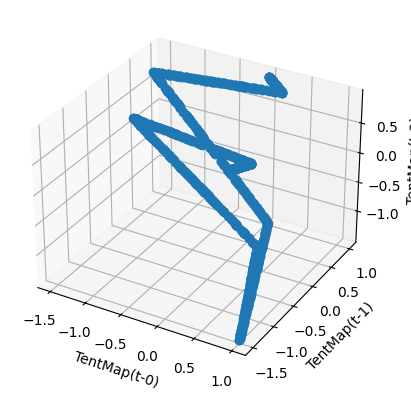

In [21]:
# plotting your manifold in 3 dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedding['TentMap(t-0)'], embedding['TentMap(t-1)'], embedding['TentMap(t-1)'], 'o')
ax.set_xlabel('TentMap(t-0)')
ax.set_ylabel('TentMap(t-1)')
ax.set_zlabel('TentMap(t-2)')


### Inference of causality via Convergent Cross Mapping (CCM)
here you are using variable 'x' to predict variavle 'y'
if the prediction is good, means that x and y are causally related. i.e. they belong to the same dynamical system
see https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/

using this framework you can identify causal relations between variables in your data, e.g. two neurons causally related will have a high CCM value, same for
one neuron that causes a behavior etc.

In [22]:
# to do causal inference you need at least 2 variables, so we load another example dataset 

data=pd.read_csv('/Users/acamassa/pyEDM/pyEDM/data/sardine_anchovy_sst.csv')
data

,year,anchovy,sardine,sio_sst,np_sst
0,1929,-0.007599,1.770090,-0.352393,-0.347846
1,1930,-0.009602,-1.151520,0.001149,0.328734
2,1931,-0.008444,-1.420680,1.068220,1.610270
3,1932,-0.008354,0.112222,0.531857,1.265340
4,1933,-0.007750,1.515550,-0.552058,0.040046
...,...,...,...,...,...
73,2002,-0.741992,0.138018,0.658063,-1.186420
74,2003,-0.157825,-0.360649,0.634573,-1.342620
75,2004,0.249897,0.189861,1.219800,-0.530206
76,2005,0.213121,-0.130771,1.749450,-0.757965


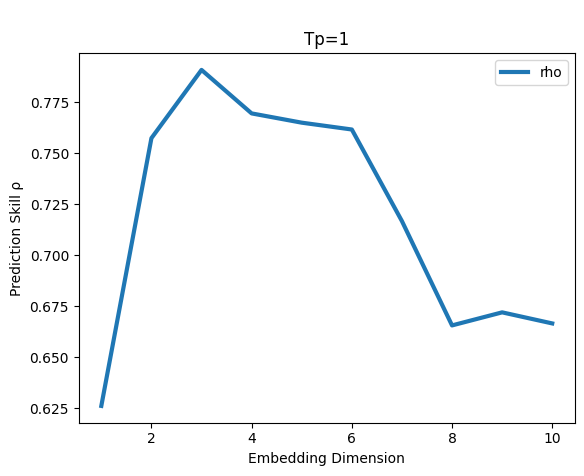

,E,rho
0,1.0,0.626142
1,2.0,0.757497
2,3.0,0.790982
3,4.0,0.769651
4,5.0,0.765103
5,6.0,0.761751
6,7.0,0.716812
7,8.0,0.665638
8,9.0,0.672046
9,10.0,0.666614


In [23]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "np_sst" )

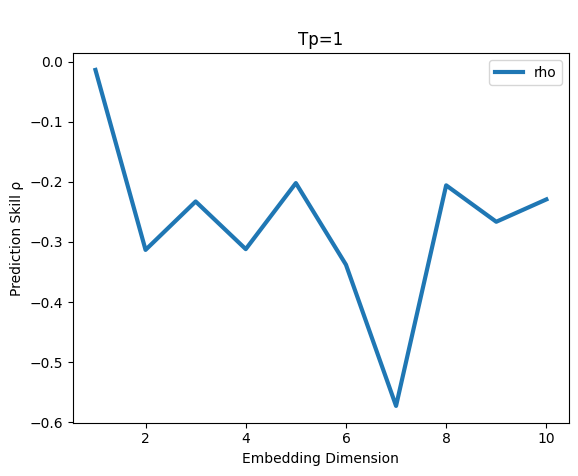

,E,rho
0,1.0,-0.013988
1,2.0,-0.313169
2,3.0,-0.232687
3,4.0,-0.311908
4,5.0,-0.202091
5,6.0,-0.337827
6,7.0,-0.572572
7,8.0,-0.205843
8,9.0,-0.266408
9,10.0,-0.229249


In [24]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "sardine" )

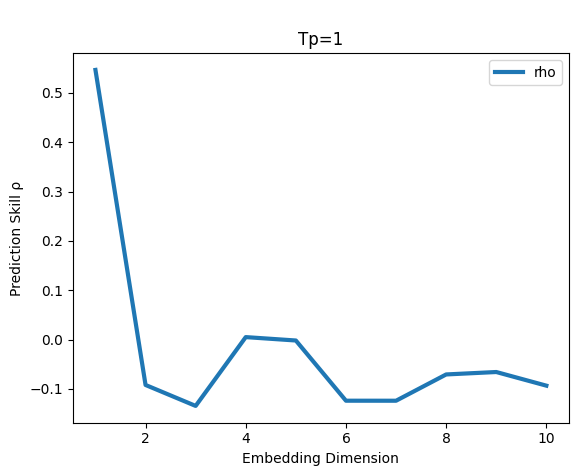

,E,rho
0,1.0,0.546423
1,2.0,-0.092071
2,3.0,-0.134533
3,4.0,0.004924
4,5.0,-0.001955
5,6.0,-0.123966
6,7.0,-0.124010
7,8.0,-0.070746
8,9.0,-0.065822
9,10.0,-0.093472


In [25]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "anchovy" )

### CCM function
the function uses the variable in column to predict the variable in target, and viceversa
see https://sugiharalab.github.io/EDM_Documentation/edm_functions/#ccm

note the libSizes parameter here: this is the amount of data you use to make the prediciton
use increasing library sizes in order to verify that the predictability increases when using more data
if this is not true, means that there is No causal relationship between your variables.

Parameters::Validate(): Set knn = 4 (E+1) for Simplex. 
cppEDM Version 1.14.3 2023-07-05
CrossMap(): Simplex cross mapping from np_sst to anchovy  E=3  knn=4  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 

CrossMap(): Simplex cross mapping from anchovy to np_sst  E=3  knn=4  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 



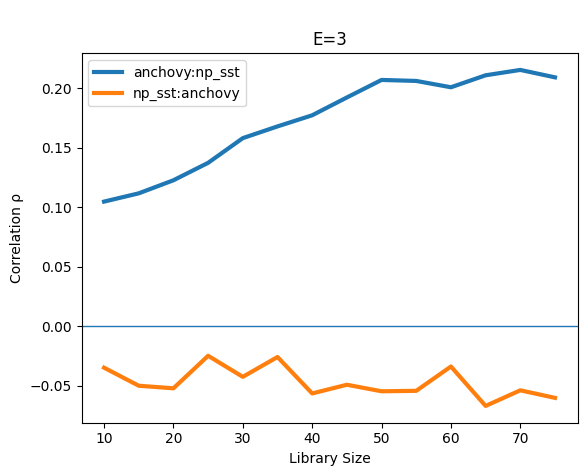

In [26]:
# let's use E = 3 
output_ccm=CCM( dataFrame = data, E = 3, 
     columns = "anchovy", target = "np_sst",
     libSizes = "10 75 5", sample = 100, includeData=True, parameterList=False, showPlot = True, verbose=True);

In [27]:
output_ccm

{'LibMeans':     LibSize  anchovy:np_sst  np_sst:anchovy
 0      10.0        0.104641       -0.034995
 1      15.0        0.111599       -0.050175
 2      20.0        0.122577       -0.052325
 3      25.0        0.137245       -0.024981
 4      30.0        0.158006       -0.042689
 5      35.0        0.167861       -0.026001
 6      40.0        0.177207       -0.056644
 7      45.0        0.192182       -0.049327
 8      50.0        0.206922       -0.054822
 9      55.0        0.206083       -0.054447
 10     60.0        0.200760       -0.033997
 11     65.0        0.210835       -0.067135
 12     70.0        0.215344       -0.054013
 13     75.0        0.209092       -0.060368,
 'PredictStats1':            N    E   nn  tau  LibSize       rho      RMSE       MAE
 0        1.0  3.0  4.0 -1.0     10.0  0.115782  1.048019  0.828144
 1        2.0  3.0  4.0 -1.0     10.0  0.105831  1.253186  1.014887
 2        3.0  3.0  4.0 -1.0     10.0  0.279743  1.185742  0.965628
 3        4.0  3.0  4.0

### Multivariate embedding prediction
you can use here more than one column for the prediction, making a Multivariate embedding: 
If there are multiple columns and embedded is false, each column is time-delay embedded to dimension E creating an N-columns * E dimensional "mixed" embedding. If embedded is true, no time-delay embedding is done, creating a multivariate embedding of the speficied columns. 

Parameters::Validate(): Set knn = 3 (E+1) for Simplex. 
cppEDM Version 1.14.3 2023-07-05
CCM() multiple columns/target.
CCM(): embedding columns: anchovy sardine 
CCM(): embedding target:  np_sst 
CrossMap(): Simplex cross mapping from anchovy to np_sst  E=2  knn=3  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 

CrossMap(): Simplex cross mapping from np_sst to anchovy  E=1  knn=3  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 



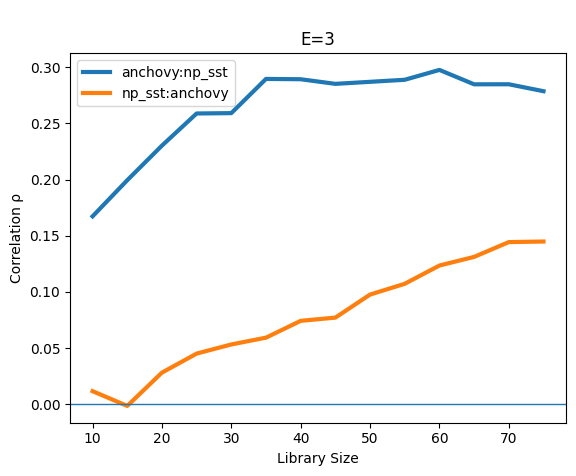

In [28]:
# with embedding True, using both anchovy and sardine columns multivariate embedding
output_ccm=CCM( dataFrame = data, E = 3, 
     columns = "anchovy, sardine", target = "np_sst",
     libSizes = "10 75 5", sample = 100, embedded=True, 
     showPlot = True, verbose=True)

In [29]:
data

,year,anchovy,sardine,sio_sst,np_sst
0,1929,-0.007599,1.770090,-0.352393,-0.347846
1,1930,-0.009602,-1.151520,0.001149,0.328734
2,1931,-0.008444,-1.420680,1.068220,1.610270
3,1932,-0.008354,0.112222,0.531857,1.265340
4,1933,-0.007750,1.515550,-0.552058,0.040046
...,...,...,...,...,...
73,2002,-0.741992,0.138018,0.658063,-1.186420
74,2003,-0.157825,-0.360649,0.634573,-1.342620
75,2004,0.249897,0.189861,1.219800,-0.530206
76,2005,0.213121,-0.130771,1.749450,-0.757965


### CCM matrix 
if you have multiple variables and want to evaluate causal relationship between each pair of variables,
you can use the CCM function in a for loop as follows:

In [38]:
CCM_matrix=np.zeros((len(data.columns[1:]),len(data.columns[1:])))

for i in range(len(data.columns[1:])):
    for j in range(len(data.columns[1:])):

        # here I use E=3 and a fixed library size to make it simple
        out_ccm=CCM(dataFrame = data,  E=3, libSizes="70", random=False, sample=1,
                        columns = data.columns[i+1], target=data.columns[j+1])
        
        value = out_ccm[data.columns[i+1] + ':' + data.columns[j+1]].values
        CCM_matrix[j, i] = value.item()  

        value = out_ccm[data.columns[j+1] + ':' + data.columns[i+1]].values
        CCM_matrix[i, j] = value.item()  


In [39]:
CCM(dataFrame = data,  E=3, libSizes="70", random=False, sample=1,
                        columns = data.columns[1], target=data.columns[-1])

,LibSize,anchovy:np_sst,np_sst:anchovy
0,70.0,0.168634,-0.061514


Text(0, 0.5, 'From')

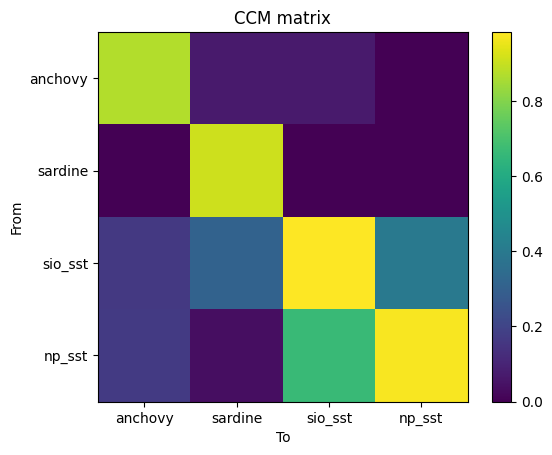

In [45]:
# plot your CCM matrix
plt.figure()
CCM_matrix[CCM_matrix<0]=0
plt.imshow(CCM_matrix)
plt.clim([0,np.max(CCM_matrix)])
plt.colorbar()
plt.xticks(np.arange(0, len(data.columns[1:])), data.columns[1:])
plt.yticks(np.arange(0, len(data.columns[1:])), data.columns[1:])
plt.title('CCM matrix')
plt.xlabel('To')
plt.ylabel('From')

### Resources:
I recommend you to read this paper https://link.springer.com/article/10.1007/s11284-017-1469-9

Feel free to email me if you have questions! acamassa@salk.edu

